### Problem Statement 2: Multiple Feature Linear Regression

**Business Problem:**  
"Build a comprehensive model to predict Yearly Amount Spent using customer engagement metrics: Length of Membership, Time on App, 'Time on Website', and Avg. Session Length. Determine which platform (app vs website) drives more revenue."
"Predict Yearly Amount Spent using multiple customer behaviors. Determine which factors matter most for revenue."

## Step 1: Understand Multiple Linear Regression

In [6]:
# Multiple Linear Regression equation:
# y = b₀ + b₁×x₁ + b₂×x₂ + b₃×x₃ + ... 
# Each feature gets its own coefficient (b)


# load data from a CSV file and print the first 5 rows in well formatted way comma separated values
import pandas as pd
df = pd.read_csv('../linear_regression_problems/data/Ecommerce_Customers.csv')


# Select multiple features
feature_columns = ['Length of Membership', 'Time on App', 'Time on Website', 'Avg. Session Length']
X = df[feature_columns]
y = df['Yearly Amount Spent']

print("Features we're using:")
for i, col in enumerate(feature_columns):
    print(f"  x{i+1}: {col}")

Features we're using:
  x1: Length of Membership
  x2: Time on App
  x3: Time on Website
  x4: Avg. Session Length


## Step 2: Explore Feature Relationships

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# Create correlation matrix (how features relate to each other)
# corelation matrix is a table showing correlation coefficients between variables meaning how variables are related to each other
# Why important? Features shouldn't be too correlated with each other (multicollinearity)

correlation_matrix = df[feature_columns + ['Yearly Amount Spent']].corr()

# Create interactive heatmap
fig = px.imshow(
    correlation_matrix,
    text_auto='.2f',  # Show values with 2 decimals
    title='Correlation Matrix: How Features Relate',
    color_continuous_scale='RdBu_r',  # Red-Blue color scheme
    zmin=-1, zmax=1  # Correlation ranges from -1 to 1
)
fig.update_layout(width=600, height=600)
fig.show()

# What to look for:
# - High correlation with target (good!)
# - High correlation between features (potential problem - redundant information)

## Step 3: Create Pair Plots

In [9]:
# Pair plot shows all relationships at once
# This helps identify patterns and outliers

fig = px.scatter_matrix(
    df[feature_columns + ['Yearly Amount Spent']],
    dimensions=feature_columns + ['Yearly Amount Spent'],
    title='Pair Plot: All Feature Relationships',
    height=800
)
fig.update_traces(diagonal_visible=False, showupperhalf=False)
fig.show()

## Step 4: Split and Train

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split data 20% test, 80% train
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and train model
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

# Make predictions
y_train_pred = model_multi.predict(X_train)
y_test_pred = model_multi.predict(X_test)

## Step 5: Understand Feature Importance

In [15]:
import numpy as np

# Get coefficients (how much each feature contributes)
coefficients = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': model_multi.coef_, # its an array of coefficients for each feature
    'Abs_Coefficient': np.abs(model_multi.coef_)  
})
coefficients = coefficients.sort_values('Abs_Coefficient', ascending=False)

print("Feature Importance (Coefficients):")
print(coefficients)

# Visualize feature importance
fig = px.bar(
    coefficients,
    x='Coefficient',
    y='Feature',
    orientation='h',
    title='Feature Importance: Which factors drive spending?',
    labels={'Coefficient': 'Impact on Yearly Spending ($)'},
    color='Coefficient',
    color_continuous_scale='RdBu_r'
)
fig.show()

# Interpretation example:
# If Time on App coefficient = 38.59, then:
# "Each additional minute on app → $38.59 more yearly spending"

Feature Importance (Coefficients):
                Feature  Coefficient  Abs_Coefficient
0  Length of Membership    61.896829        61.896829
1           Time on App    38.785346        38.785346
3   Avg. Session Length    25.596259        25.596259
2       Time on Website     0.310386         0.310386


## Step 6: Plot and observe the graph line
- 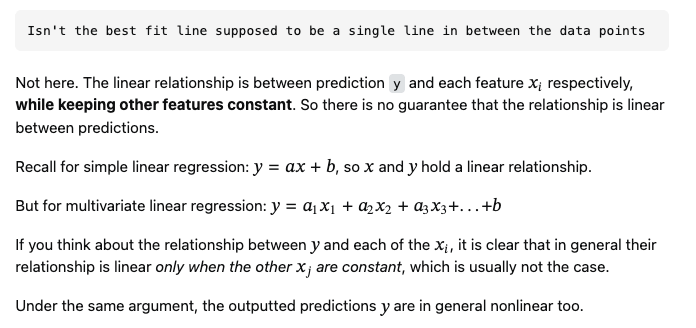

In [22]:
import plotly.graph_objects as go
import numpy as np

# Create a scatter plot for actual vs predicted values
fig = go.Figure()

# Add actual data points
fig.add_trace(go.Scatter(
    x=X_test['Length of Membership'],  # Replace with the most important feature
    y=y_test,
    mode='markers',
    name='Actual Data',
    marker=dict(size=8, opacity=0.6)
))

# Add predicted regression line
# Generate predictions for a range of values for the most important feature
x_range = np.linspace(X_test['Length of Membership'].min(), X_test['Length of Membership'].max(), 100)
y_line = model_multi.predict(X_test.assign(**{'Length of Membership': x_range}))

fig.add_trace(go.Scatter(
    x=x_range,
    y=y_line,
    mode='lines',
    name='Regression Line',
    line=dict(color='red', width=2)
))

# Update layout for better visualization
fig.update_layout(
    title='Linear Regression: Actual vs Predicted',
    xaxis_title='Length of Membership',
    yaxis_title='Yearly Amount Spent ($)',
    hovermode='closest'
)

# Show the plot
fig.show()

## Step 7: Residual Analysis
- This step involves analyzing the residuals (the differences between the observed and predicted values) to assess the model's performance. A good model will have residuals that are randomly distributed around zero, indicating that the model captures the underlying patterns in the data well.

In [23]:
# Residuals = Actual - Predicted
# Good model has random residuals (no pattern)

residuals = y_test - y_test_pred

# Create residual plot
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=y_test_pred,
    y=residuals,
    mode='markers',
    marker=dict(size=8, opacity=0.6),
    name='Residuals'
))
fig.add_hline(y=0, line_dash="dash", line_color="red")
fig.update_layout(
    title='Residual Plot: Checking Model Assumptions',
    xaxis_title='Predicted Values',
    yaxis_title='Residuals',
    hovermode='closest'
)
fig.show()

# What to look for:
# - Random scatter around 0 line (good)
# - Pattern/curve (model missing something)
# - Funnel shape (heteroscedasticity - variance changes)